In [1]:
# @title Data Reading and processing
import pandas as pd
import os
from pandas import ExcelFile
import matplotlib.pyplot as plt
import seaborn as sns
from random import sample
import numpy as np

metadata_path = '/content/drive/MyDrive/MITResearch/IBD_5/IBD_Tracker_Weekly_Feces.csv'
df = pd.read_csv(metadata_path, sep=';')

In [2]:
df[['Patient_Tracker_ID','IBD_phenotypes']].drop_duplicates()

,Patient_Tracker_ID,IBD_phenotypes
0,TR_2101,UC
54,TR_2201,CD
106,TR_2102,UC
159,TR_2202,CD
211,TR_2103,UC


In [3]:
df[['Exacerbation_judgement_treatingphysician', 'Exacerbation_judgement_treatingphysician_0_1']].drop_duplicates()

,Exacerbation_judgement_treatingphysician,Exacerbation_judgement_treatingphysician_0_1
0,no,0.0
26,yes,1.0
60,no,0.5


In [ ]:
df.columns

Index(['Patient_number', 'Patient_Tracker_ID', 'PatientID_Weeknr',
       'Date_Sample_Clinical', 'IBD_phenotypes', 'Sex', 'CalproHome_Weekly',
       'Labcalpro_Date', 'Labcalpro_Value', 'ClinicalScore_Total_Weekly',
       'Exacerbation_judgement_treatingphysician',
       'Exacerbation_judgement_treatingphysician_0_1', 'Medical_Event',
       'AB_use_during_sample', 'AB_pre_post', 'Flare_status',
       'SampleNr_Weekly_Ethanol', 'Weeknumber', 'Week_Numeric',
       'Consistency_Weekly', 'SCCAI_ClinicalQ_Freq_Weekly',
       'SCCAI_ClinicalQ_FreqNight_Weekly', 'SCCAI_ClinicalQ_Hurry_Weekly',
       'SCCAI_ClinicalQ_Blood_Weekly', 'SCCAI_ClinicalQ_General_Weekly',
       'HBI_ClinicalQ_General_Weekly', 'HBI_ClinicalQ_StomachPain_Weekly',
       'HBI_ClinicalQ_Frequency_Weekly', 'HBI_ClinicalQ_ExtraCompl_Weekly',
       'Stress_Weekly', 'Tired_Weekly', 'Total_steps_Weekly',
       'Burned_Calories_Weekly', 'Active_minutes_Weekly',
       'Average_Sleep_hrs_Weekly', 'Average_heartrate'

In [ ]:
df = df.dropna(subset=['Week_Numeric'])
df = df.drop("Weeknumber", axis=1)

numeric_columns = [
    'CalproHome_Weekly', 'Labcalpro_Value', 'ClinicalScore_Total_Weekly',
    'Exacerbation_judgement_treatingphysician_0_1', 'Week_Numeric', 'HBI_ClinicalQ_Frequency_Weekly',
    'Consistency_Weekly',  'Average_Sleep_hrs_Weekly', 'Average_heartrate',
        'Total_steps_Weekly', 'Burned_Calories_Weekly', 'Active_minutes_Weekly'
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

string_columns = ['PatientID_Weeknr',  'Medical_Event', 'SampleNr_Weekly_Ethanol']

for col in string_columns:
    df[col] = df[col].astype(str)

factor_columns = ['Stress_Weekly', 'Tired_Weekly', 'Sex', 'Patient_Tracker_ID', 'Exacerbation_judgement_treatingphysician', 'AB_use_during_sample',
                  	'AB_pre_post',	'Flare_status',  'SCCAI_ClinicalQ_Freq_Weekly', 'SCCAI_ClinicalQ_FreqNight_Weekly', 'SCCAI_ClinicalQ_Hurry_Weekly',
    'SCCAI_ClinicalQ_Blood_Weekly', 'SCCAI_ClinicalQ_General_Weekly', 'IBD_phenotypes', 'HBI_ClinicalQ_General_Weekly',
    'HBI_ClinicalQ_StomachPain_Weekly', 'HBI_ClinicalQ_ExtraCompl_Weekly']

for col in factor_columns:
    df[col] = df[col].astype('category')

df['Date_Sample_Clinical'] = pd.to_datetime(df['Date_Sample_Clinical'], format='%d_%B_%Y')
df['Labcalpro_Date'] = pd.to_datetime(df['Labcalpro_Date'], format='%d_%B_%Y')

# shifting the week numbers so that the three patients have the beginning of their flare at the same time, which makes it easier to compare visually
#df.loc[df['Patient_Tracker_ID'] == "TR_2101", 'Week_Numeric'] += 2
df.loc[df['Patient_Tracker_ID'] == "TR_2102", 'Week_Numeric'] += 11

df.dtypes

Patient_number                                           int64
Patient_Tracker_ID                                    category
PatientID_Weeknr                                        object
Date_Sample_Clinical                            datetime64[ns]
IBD_phenotypes                                        category
Sex                                                   category
CalproHome_Weekly                                      float64
Labcalpro_Date                                  datetime64[ns]
Labcalpro_Value                                        float64
ClinicalScore_Total_Weekly                             float64
Exacerbation_judgement_treatingphysician              category
Exacerbation_judgement_treatingphysician_0_1           float64
Medical_Event                                           object
AB_use_during_sample                                  category
AB_pre_post                                           category
Flare_status                                          c

In [ ]:
df[1:50]

,Patient_number,Patient_Tracker_ID,PatientID_Weeknr,Date_Sample_Clinical,IBD_phenotypes,Sex,CalproHome_Weekly,Labcalpro_Date,Labcalpro_Value,ClinicalScore_Total_Weekly,...,HBI_ClinicalQ_StomachPain_Weekly,HBI_ClinicalQ_Frequency_Weekly,HBI_ClinicalQ_ExtraCompl_Weekly,Stress_Weekly,Tired_Weekly,Total_steps_Weekly,Burned_Calories_Weekly,Active_minutes_Weekly,Average_Sleep_hrs_Weekly,Average_heartrate
1,110001,TR_2101,TR_2101_Weekly_Feces_Week_2,2019-06-22,UC,M,25.0,NaT,NaN,3.0,...,NaN,NaN,NaN,D,D,59620.0,7209.0,1512.0,6.0,62.0
2,110001,TR_2101,TR_2101_Weekly_Feces_Week_3,2019-06-29,UC,M,26.0,NaT,NaN,3.0,...,NaN,NaN,NaN,D,D,114450.0,22782.0,451.0,48.0,53.0
3,110001,TR_2101,TR_2101_Weekly_Feces_Week_4,2019-07-06,UC,M,0.0,NaT,NaN,5.0,...,NaN,NaN,NaN,D,D,110516.0,21741.0,840.0,NaN,55.0
4,110001,TR_2101,TR_2101_Weekly_Feces_Week_5,2019-07-13,UC,M,28.0,NaT,NaN,2.0,...,NaN,NaN,NaN,D,D,115253.0,22002.0,540.0,NaN,55.0
5,110001,TR_2101,TR_2101_Weekly_Feces_Week_6,2019-07-19,UC,M,25.0,NaT,NaN,2.0,...,NaN,NaN,NaN,D,D,110100.0,21098.0,420.0,NaN,70.0
6,110001,TR_2101,TR_2101_Weekly_Feces_Week_7,2019-07-27,UC,M,28.0,NaT,NaN,3.0,...,NaN,NaN,NaN,D,D,113308.0,20042.0,462.0,NaN,77.0
7,110001,TR_2101,TR_2101_Weekly_Feces_Week_8,2019-08-03,UC,M,25.0,NaT,NaN,2.0,...,NaN,NaN,NaN,D,D,90365.0,20929.0,120.0,NaN,76.0
8,110001,TR_2101,TR_2101_Weekly_Feces_Week_9,2019-08-10,UC,M,25.0,NaT,NaN,2.0,...,NaN,NaN,NaN,D,D,109700.0,22573.0,455.0,NaN,78.0
9,110001,TR_2101,TR_2101_Weekly_Feces_Week_10,2019-08-17,UC,M,25.0,NaT,NaN,2.0,...,NaN,NaN,NaN,D,D,74952.0,19152.0,222.0,NaN,55.0
10,110001,TR_2101,TR_2101_Weekly_Feces_Week_11,2019-08-24,UC,M,25.0,NaT,NaN,4.0,...,NaN,NaN,NaN,D,D,85393.0,20349.0,273.0,NaN,56.0


In [ ]:
df.describe()

,Patient_number,Date_Sample_Clinical,CalproHome_Weekly,Labcalpro_Date,Labcalpro_Value,ClinicalScore_Total_Weekly,Exacerbation_judgement_treatingphysician_0_1,Week_Numeric,Consistency_Weekly,HBI_ClinicalQ_Frequency_Weekly,Total_steps_Weekly,Burned_Calories_Weekly,Active_minutes_Weekly,Average_Sleep_hrs_Weekly,Average_heartrate
count,263.000000,263,231.000000,44,44.000000,247.000000,263.000000,263.000000,244.000000,98.000000,234.000000,234.000000,234.000000,34.000000,234.000000
mean,110003.000000,2020-02-29 23:38:05.931558912,179.709957,2020-02-14 04:54:32.727272704,240.477273,3.518219,0.171103,28.220532,4.032787,2.367347,63111.935897,11493.388889,189.346154,7.617647,65.205128
min,110001.000000,2019-06-16 00:00:00,0.000000,2019-06-17 00:00:00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,250.000000,0.000000,0.000000,5.000000,0.000000
25%,110002.000000,2019-11-11 12:00:00,33.000000,2019-10-05 06:00:00,56.500000,2.000000,0.000000,15.000000,3.000000,1.000000,41615.750000,2116.750000,8.000000,6.000000,57.000000
50%,110003.000000,2020-03-01 00:00:00,81.000000,2020-01-22 00:00:00,148.000000,4.000000,0.000000,28.000000,4.000000,3.000000,56269.500000,12304.500000,132.500000,6.500000,66.000000
75%,110004.000000,2020-06-01 00:00:00,192.500000,2020-03-25 18:00:00,257.250000,5.000000,0.000000,41.000000,4.000000,3.000000,87198.750000,19129.250000,295.750000,7.000000,75.000000
max,110005.000000,2021-01-30 00:00:00,2000.000000,2021-10-10 00:00:00,1990.000000,9.000000,1.000000,63.000000,7.000000,8.000000,122031.000000,87779.000000,1512.000000,48.000000,82.000000
std,1.419601,NaN,323.383213,NaN,339.236659,1.944001,0.369652,15.850832,1.269681,1.508654,26750.968091,9305.490155,208.144211,7.181688,14.568788


In [ ]:
constant_columns = []

# Group the data by Patient_Tracker_ID and check the number of unique values in each column.
for column in df.columns:
    grouped_data = df.groupby('Patient_Tracker_ID')[column].nunique()
    if all(grouped_data == 1):
        constant_columns.append(column)

constant_columns

df[constant_columns].drop_duplicates()

,Patient_number,Patient_Tracker_ID,IBD_phenotypes,Sex
0,110001,TR_2101,UC,M
54,110002,TR_2201,CD,F
106,110003,TR_2102,UC,F
159,110004,TR_2202,CD,F
211,110005,TR_2103,UC,M


In [ ]:
df['Flare_status'].unique()

['Pre_flare', 'During_flare', 'Post_flare', 'No_flare', 'Before_infusion', 'After_infusion', 'Pre_flare_two', 'During_flare_2', 'Post_flare_2']
Categories (9, object): ['After_infusion', 'Before_infusion', 'During_flare', 'During_flare_2', ...,
                         'Post_flare', 'Post_flare_2', 'Pre_flare', 'Pre_flare_two']

In [ ]:
df[df['Week_Numeric']<28][df['Week_Numeric']>25][['Week_Numeric',	'Patient_Tracker_ID',	'PatientID_Weeknr','Flare_status'	]]

<ipython-input-7-1cc2b7f0e69a>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Week_Numeric']<28][df['Week_Numeric']>25][['Week_Numeric',	'Patient_Tracker_ID',	'PatientID_Weeknr','Flare_status'	]]


,Week_Numeric,Patient_Tracker_ID,PatientID_Weeknr,Flare_status
26,26.0,TR_2101,TR_2101_Weekly_Feces_Week_25,During_flare
27,27.0,TR_2101,TR_2101_Weekly_Feces_Week_26,During_flare
80,26.0,TR_2201,TR_2201_Weekly_Feces_Week_27,No_flare
81,27.0,TR_2201,TR_2201_Weekly_Feces_Week_28,No_flare
121,26.0,TR_2102,TR_2102_Weekly_Feces_Week_16,During_flare
122,27.0,TR_2102,TR_2102_Weekly_Feces_Week_17,During_flare
185,26.0,TR_2202,TR_2202_Weekly_Feces_Week_27,No_flare
186,27.0,TR_2202,TR_2202_Weekly_Feces_Week_28,No_flare
237,26.0,TR_2103,TR_2103_Weekly_Feces_Week_27,During_flare
238,27.0,TR_2103,TR_2103_Weekly_Feces_Week_28,During_flare


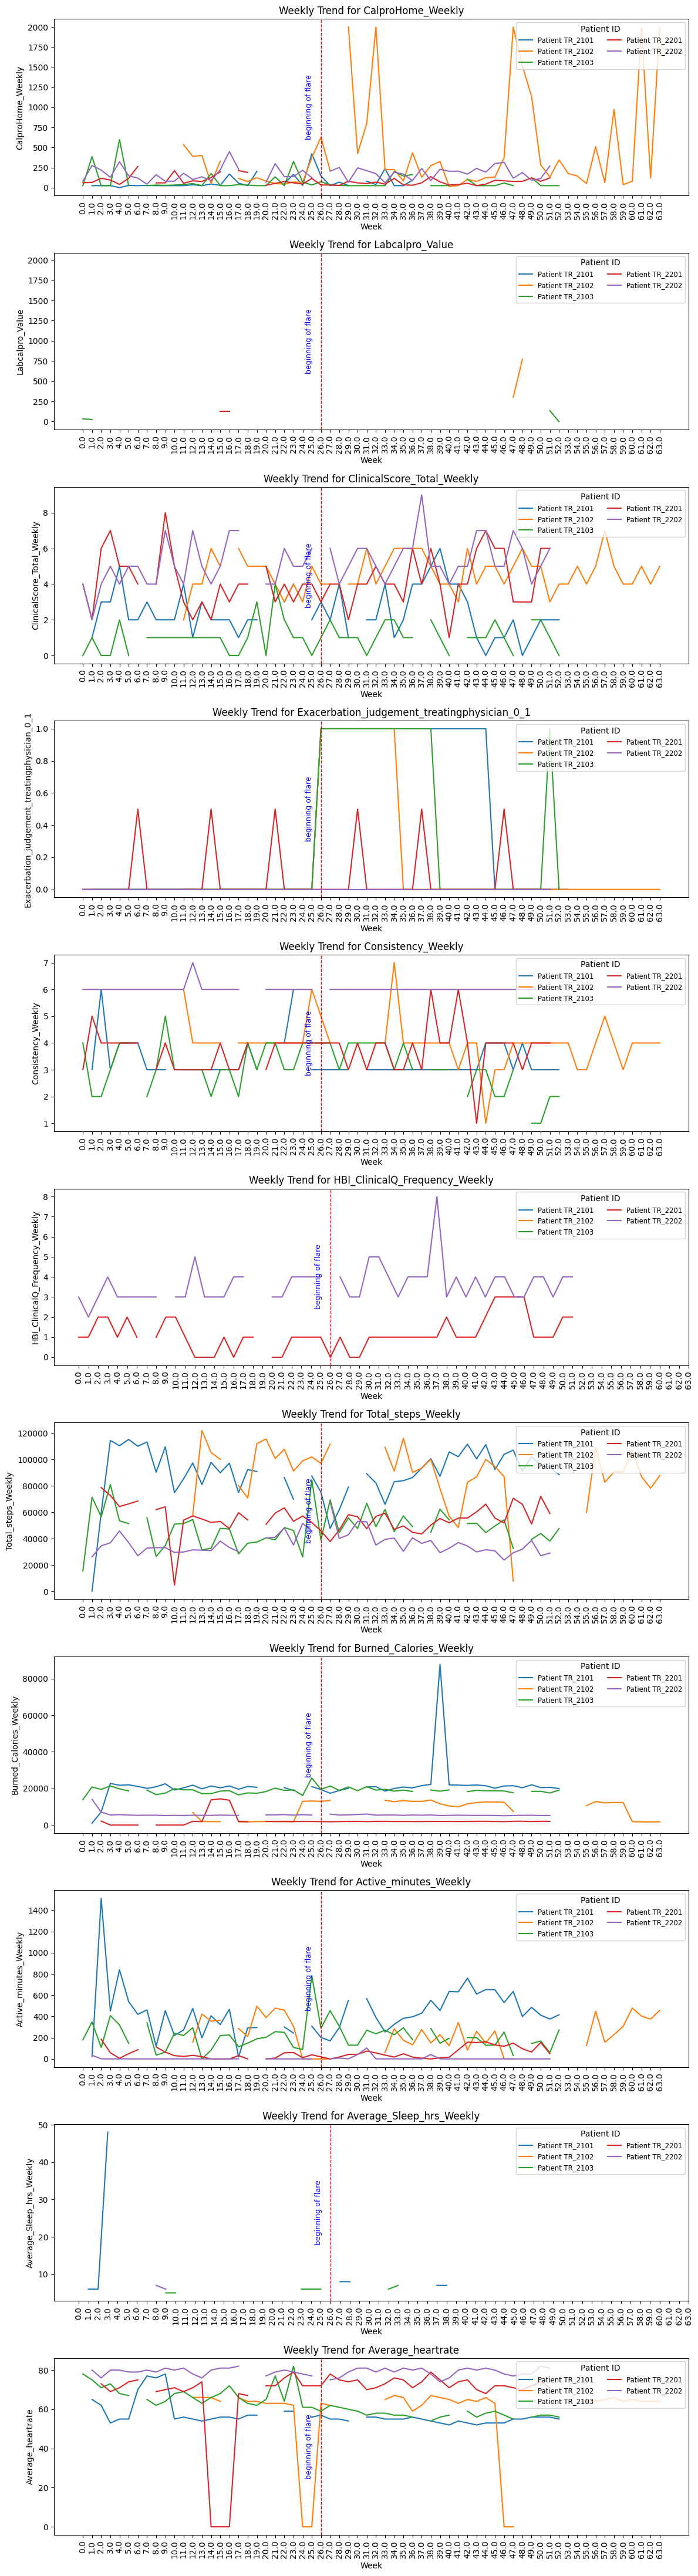

In [ ]:
# List of non-constant columns, using the previously identified constant columns
non_constant_columns = [col for col in df.columns if col not in constant_columns]

# Filter columns for numerical data types and ensure 'Week_Numeric' and 'Patient_Tracker_ID' are included for grouping
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_columns = [col for col in numerical_columns if col in non_constant_columns and col != 'Week_Numeric']

# Create dataframe for plotting
plot_df = df[plot_columns + ['Patient_Tracker_ID', 'Week_Numeric']]

# Calculate the number of plots needed
num_plots = len(plot_columns)  # Exclude 'Week_Numeric' and 'Patient_Tracker_ID'
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots), squeeze=False)  # Ensure axes is always a 2D array

important_weeks = [26]  # Weeks on which to draw vertical lines
annotations = ["beginning of flare"]  # Corresponding annotations

for idx, column in enumerate(plot_columns):
    ax = axes[idx, 0]
    for label, grp in plot_df.groupby('Patient_Tracker_ID'):
        ax.plot(grp['Week_Numeric'], grp[column], label=f'Patient {label}')
    for week, annotation in zip(important_weeks, annotations):
        ax.axvline(x=week, color='r', linestyle='--', linewidth=1)
        ax.annotate(annotation, xy=(week, 0.5), xycoords=('data', 'axes fraction'),
                    textcoords="offset points", xytext=(-10,0), ha='right', va='center',
                    fontsize=9, color='blue', rotation=90)
    ax.set_title(f'Weekly Trend for {column}')
    ax.set_xlabel('Week')
    ax.set_ylabel(column)
    ax.legend(loc='upper right', ncol=2, fontsize='small', title="Patient ID")
    # Setting x-ticks to show every week
    ax.set_xticks(df['Week_Numeric'].unique())
    ax.set_xticklabels(df['Week_Numeric'].unique(), rotation=90)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

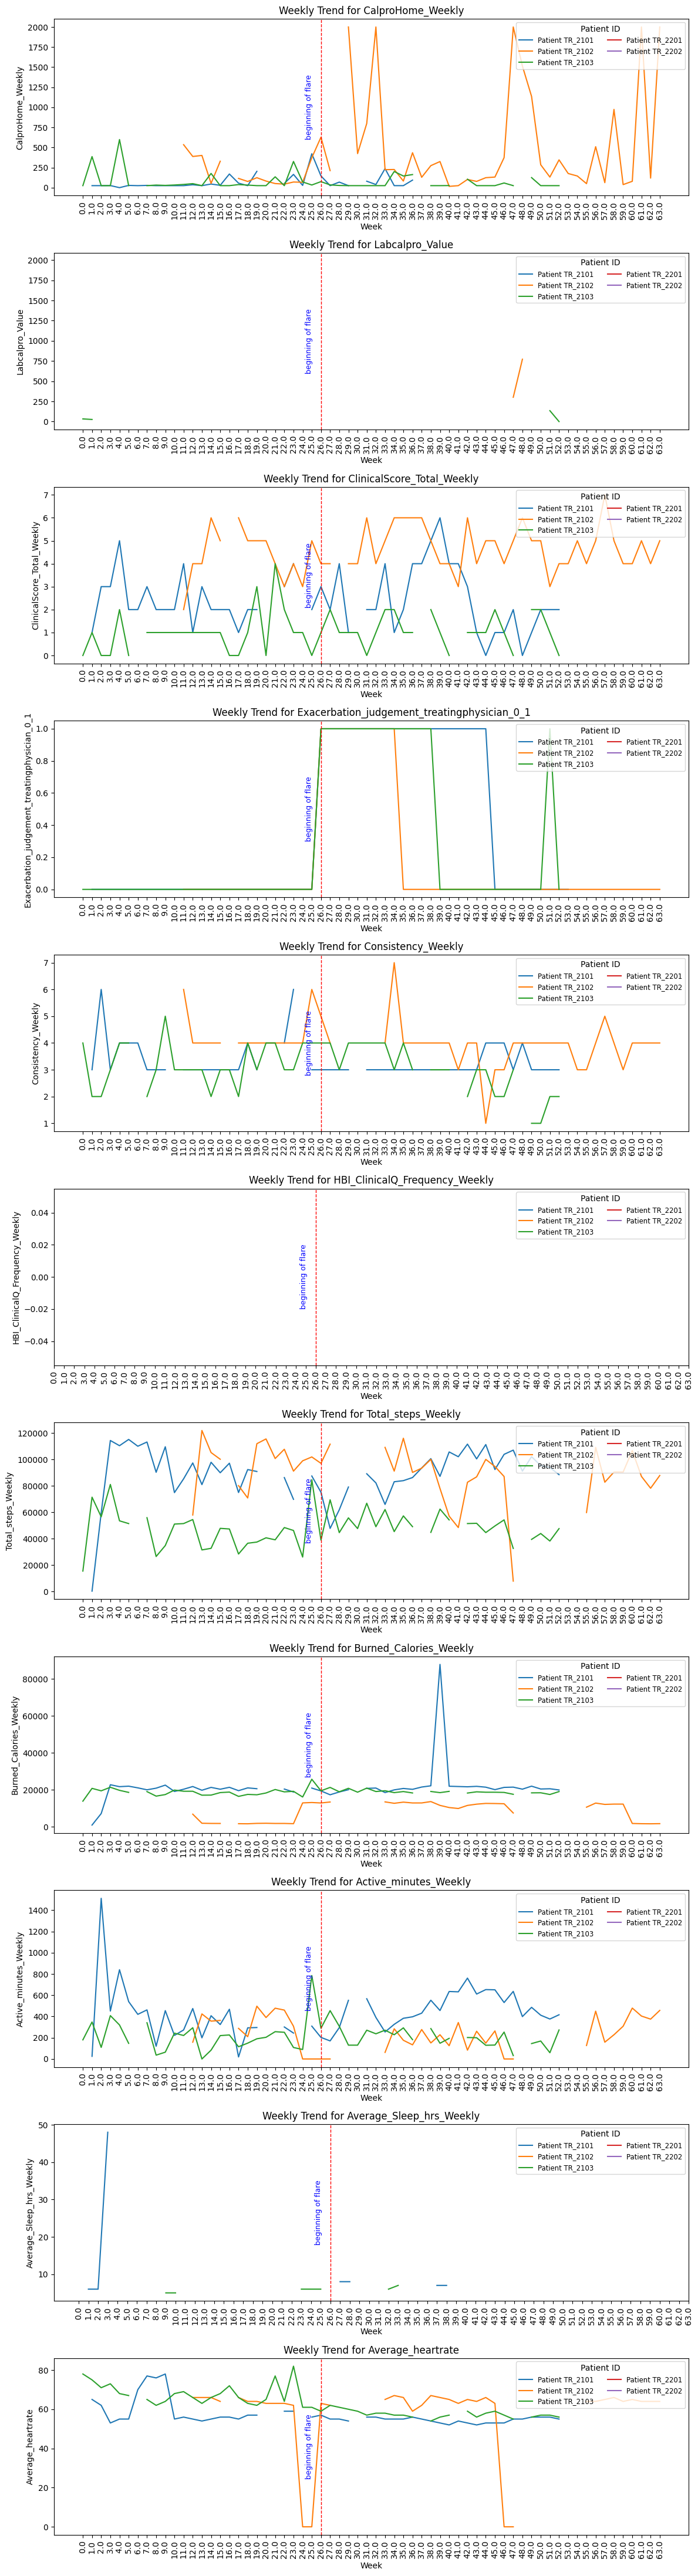

In [ ]:
# List of non-constant columns, using the previously identified constant columns
non_constant_columns = [col for col in df.columns if col not in constant_columns]

# Filter columns for numerical data types and ensure 'Week_Numeric' and 'Patient_Tracker_ID' are included for grouping
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
plot_columns = [col for col in numerical_columns if col in non_constant_columns and col != 'Week_Numeric']

# Create dataframe for plotting
plot_df = df[plot_columns + ['Patient_Tracker_ID', 'Week_Numeric']][df['Patient_Tracker_ID'].isin(["TR_2101","TR_2102","TR_2103"])]

# Calculate the number of plots needed
num_plots = len(plot_columns)  # Exclude 'Week_Numeric' and 'Patient_Tracker_ID'
fig, axes = plt.subplots(num_plots, 1, figsize=(12, 4 * num_plots), squeeze=False)  # Ensure axes is always a 2D array

important_weeks = [26]  # Weeks on which to draw vertical lines
annotations = ["beginning of flare"]  # Corresponding annotations

for idx, column in enumerate(plot_columns):
    ax = axes[idx, 0]
    for label, grp in plot_df.groupby('Patient_Tracker_ID'):
        ax.plot(grp['Week_Numeric'], grp[column], label=f'Patient {label}')
    for week, annotation in zip(important_weeks, annotations):
        ax.axvline(x=week, color='r', linestyle='--', linewidth=1)
        ax.annotate(annotation, xy=(week, 0.5), xycoords=('data', 'axes fraction'),
                    textcoords="offset points", xytext=(-10,0), ha='right', va='center',
                    fontsize=9, color='blue', rotation=90)
    ax.set_title(f'Weekly Trend for {column}')
    ax.set_xlabel('Week')
    ax.set_ylabel(column)
    ax.legend(loc='upper right', ncol=2, fontsize='small', title="Patient ID")
    # Setting x-ticks to show every week
    ax.set_xticks(df['Week_Numeric'].unique())
    ax.set_xticklabels(df['Week_Numeric'].unique(), rotation=90)  # Rotate labels for clarity

plt.tight_layout()
plt.show()

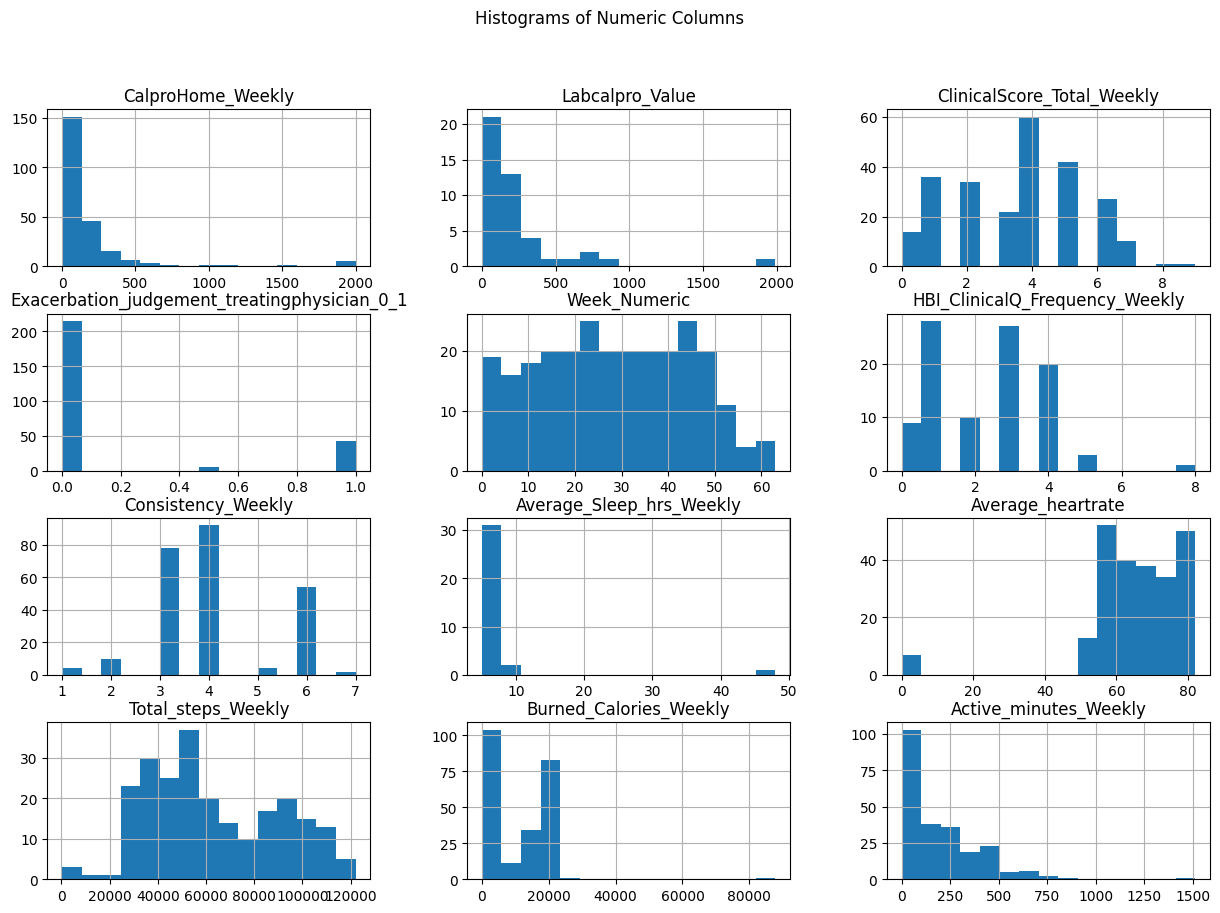

In [ ]:
# Plotting histograms for numeric columns
df[numeric_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle('Histograms of Numeric Columns')
plt.show()

In [ ]:
df[numeric_columns]

,CalproHome_Weekly,Labcalpro_Value,ClinicalScore_Total_Weekly,Exacerbation_judgement_treatingphysician_0_1,Week_Numeric,HBI_ClinicalQ_Frequency_Weekly,Consistency_Weekly,Average_Sleep_hrs_Weekly,Average_heartrate,Total_steps_Weekly,Burned_Calories_Weekly,Active_minutes_Weekly
0,25.0,0.0,1.0,0.0,1.0,NaN,3.0,6.0,65.0,250.0,1000.0,25.0
1,25.0,NaN,3.0,0.0,2.0,NaN,6.0,6.0,62.0,59620.0,7209.0,1512.0
2,26.0,NaN,3.0,0.0,3.0,NaN,3.0,48.0,53.0,114450.0,22782.0,451.0
3,0.0,NaN,5.0,0.0,4.0,NaN,4.0,NaN,55.0,110516.0,21741.0,840.0
4,28.0,NaN,2.0,0.0,5.0,NaN,4.0,NaN,55.0,115253.0,22002.0,540.0
...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,NaN,NaN,0.0,48.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,125.0,NaN,2.0,0.0,49.0,NaN,1.0,NaN,56.0,39480.0,18396.0,145.0
261,25.0,NaN,2.0,0.0,50.0,NaN,1.0,NaN,57.0,43947.0,18438.0,169.0
262,25.0,135.0,1.0,1.0,51.0,NaN,2.0,7.0,57.0,38231.0,17507.0,59.0


In [ ]:
df['Active_minutes_Weekly'].unique()

array([2.500e+01, 1.512e+03, 4.510e+02, 8.400e+02, 5.400e+02, 4.200e+02,
       4.620e+02, 1.200e+02, 4.550e+02, 2.220e+02, 2.730e+02, 4.750e+02,
       1.990e+02, 4.070e+02, 3.240e+02, 4.680e+02, 1.900e+01, 2.930e+02,
       2.960e+02,       nan, 3.010e+02, 2.440e+02, 3.090e+02, 2.030e+02,
       1.700e+02, 2.950e+02, 5.520e+02, 5.670e+02, 3.910e+02, 2.540e+02,
       3.260e+02, 3.830e+02, 3.970e+02, 4.310e+02, 5.530e+02, 4.560e+02,
       6.350e+02, 6.320e+02, 7.610e+02, 6.110e+02, 6.530e+02, 6.510e+02,
       5.310e+02, 6.360e+02, 3.990e+02, 4.860e+02, 4.120e+02, 3.760e+02,
       4.160e+02, 1.860e+02, 5.900e+01, 6.000e+00, 5.000e+01, 8.700e+01,
       1.130e+02, 6.400e+01, 3.100e+01, 2.400e+01, 3.400e+01, 2.200e+01,
       0.000e+00, 3.200e+01, 8.000e+00, 5.800e+01, 6.100e+01, 1.200e+01,
       3.900e+01, 2.000e+01, 1.800e+01, 4.300e+01, 4.400e+01, 7.400e+01,
       5.700e+01, 3.600e+01, 4.900e+01, 1.100e+01, 1.600e+01, 8.600e+01,
       1.580e+02, 1.550e+02, 1.620e+02, 1.320e+02, 

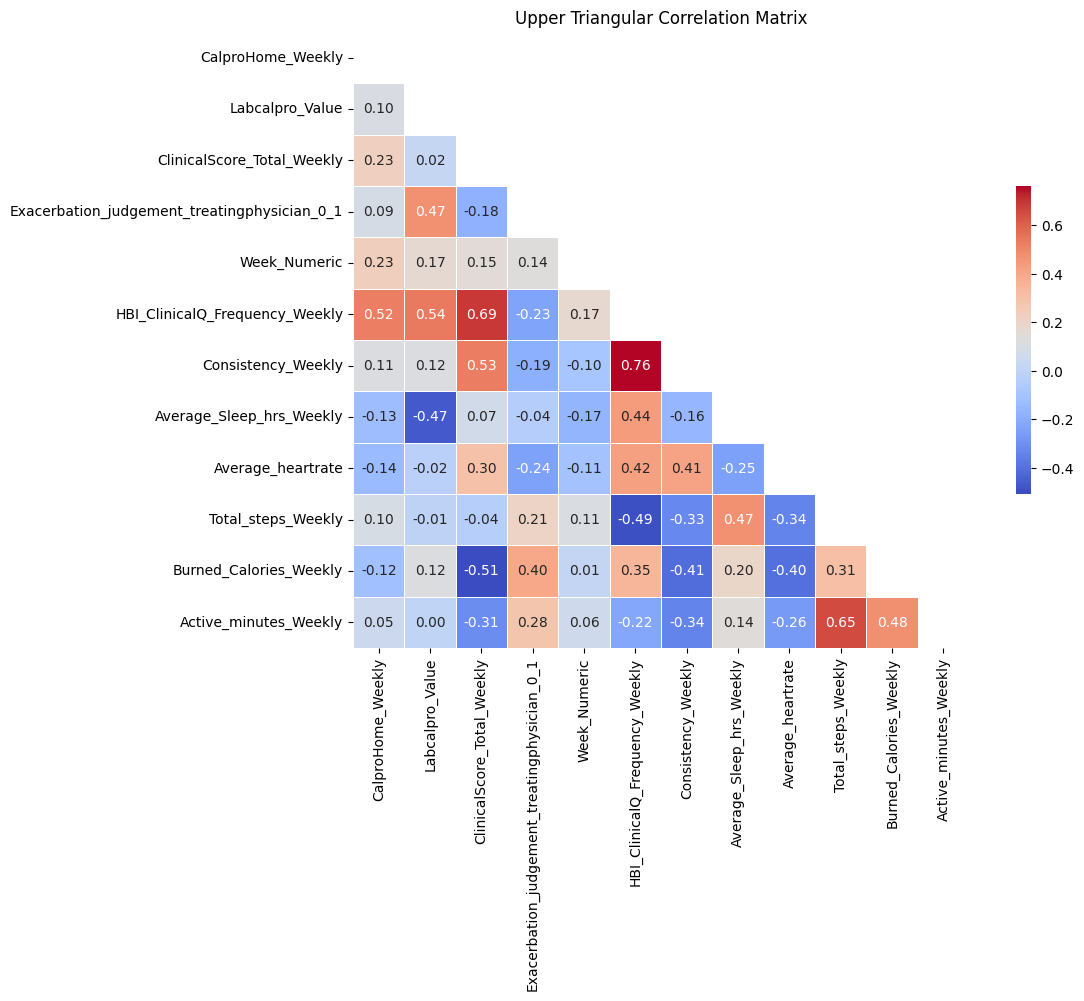

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
correlation_matrix = df[numeric_columns].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Upper Triangular Correlation Matrix')
plt.show()


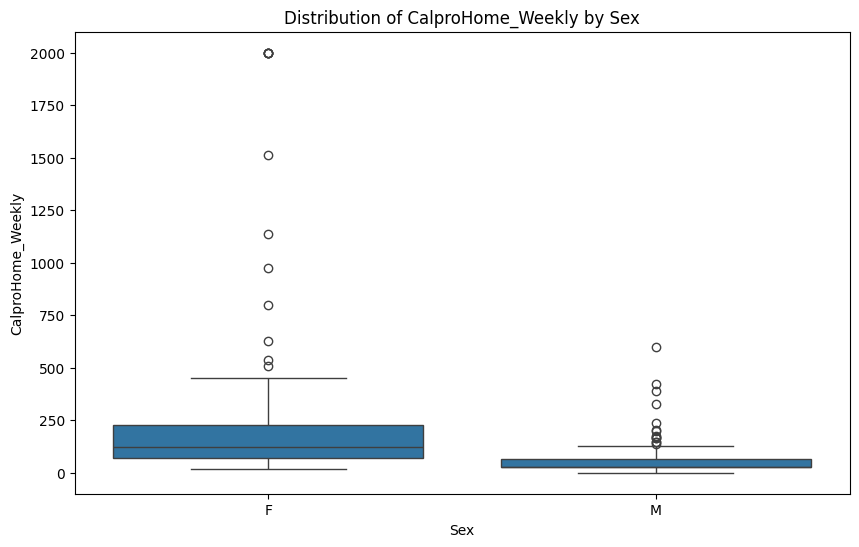

In [ ]:
# Example: Plotting boxplots of 'CalproHome_Weekly' by 'Sex'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sex', y='CalproHome_Weekly', data=df)
plt.title('Distribution of CalproHome_Weekly by Sex')
plt.show()

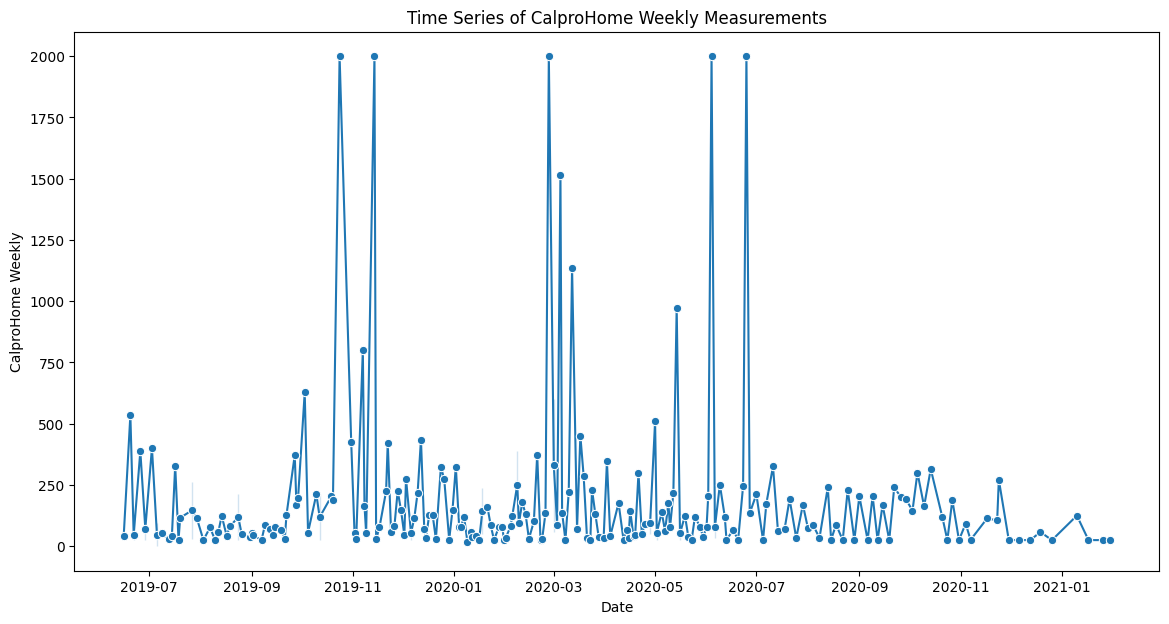

In [ ]:
# Plotting a time series of 'CalproHome_Weekly'
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date_Sample_Clinical', y='CalproHome_Weekly', data=df, marker='o')
plt.title('Time Series of CalproHome Weekly Measurements')
plt.xlabel('Date')
plt.ylabel('CalproHome Weekly')
plt.show()

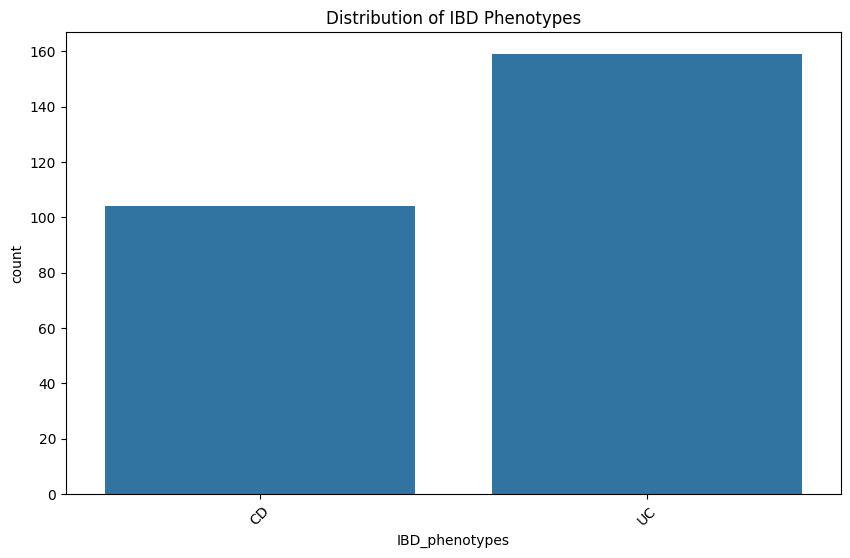

In [ ]:
# Example: Plotting count plot for 'IBD_phenotypes'
plt.figure(figsize=(10, 6))
sns.countplot(x='IBD_phenotypes', data=df)
plt.title('Distribution of IBD Phenotypes')
plt.xticks(rotation=45)
plt.show()

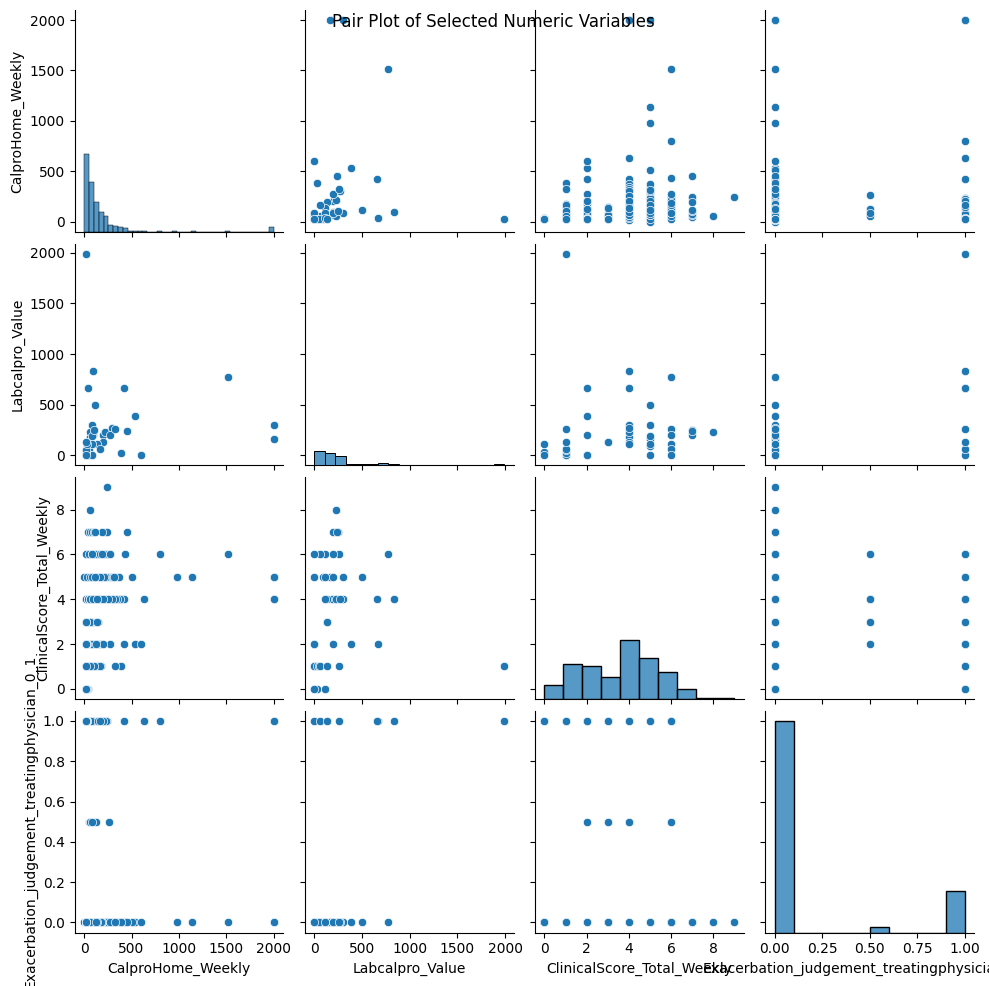

In [ ]:
# Plotting pair plots for a subset of numeric variables to keep it manageable
sns.pairplot(df[numeric_columns[:4]])
plt.suptitle('Pair Plot of Selected Numeric Variables')
plt.show()

In [ ]:
nan_percentage = df.isna().sum() / len(df)

# Filter columns where NaN percentage is less than 20%
filtered_columns = nan_percentage[nan_percentage < 0.2].index

# Select these columns from the DataFrame
filtered_df = df[filtered_columns]
filtered_df.columns

Index(['Patient_number', 'Patient_Tracker_ID', 'PatientID_Weeknr',
       'Date_Sample_Clinical', 'IBD_phenotypes', 'Sex', 'CalproHome_Weekly',
       'ClinicalScore_Total_Weekly',
       'Exacerbation_judgement_treatingphysician',
       'Exacerbation_judgement_treatingphysician_0_1', 'Medical_Event',
       'AB_use_during_sample', 'AB_pre_post', 'Flare_status',
       'SampleNr_Weekly_Ethanol', 'Week_Numeric', 'Consistency_Weekly',
       'Stress_Weekly', 'Tired_Weekly', 'Total_steps_Weekly',
       'Burned_Calories_Weekly', 'Active_minutes_Weekly', 'Average_heartrate'],
      dtype='object')

In [ ]:
df['Week_Numeric'].max()

63.0